# Part 1: Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
insurance_data = pd.read_csv(r'C:\Users\mahwi\OneDrive\Desktop\ML PIPELINE PORTFOLIO\insurance.csv')

In [4]:
print(insurance_data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [5]:
# Drop duplicate rows
insurance_data_cleaned = insurance_data.drop_duplicates()

In [6]:
# Encode categorical variables (sex, smoker, region) using pd.get_dummies
insurance_data_encoded = pd.get_dummies(insurance_data_cleaned, drop_first=True)

In [8]:
 #Separate numerical and categorical features for scaling
numerical_features = insurance_data_encoded[['age', 'bmi', 'children', 'charges']]
scaler = StandardScaler()
insurance_data_encoded[['age', 'bmi', 'children', 'charges']] = scaler.fit_transform(numerical_features)

# Display the first few rows of the standardized dataset
print(insurance_data_encoded.head())

        age       bmi  children   charges  sex_male  smoker_yes  \
0 -1.440418 -0.453160 -0.909234  0.297857         0           1   
1 -1.511647  0.509422 -0.079442 -0.954381         1           0   
2 -0.799350  0.383155  1.580143 -0.729373         1           0   
3 -0.443201 -1.305052 -0.909234  0.719104         1           0   
4 -0.514431 -0.292456 -0.909234 -0.777499         1           0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 1                 0                 0  


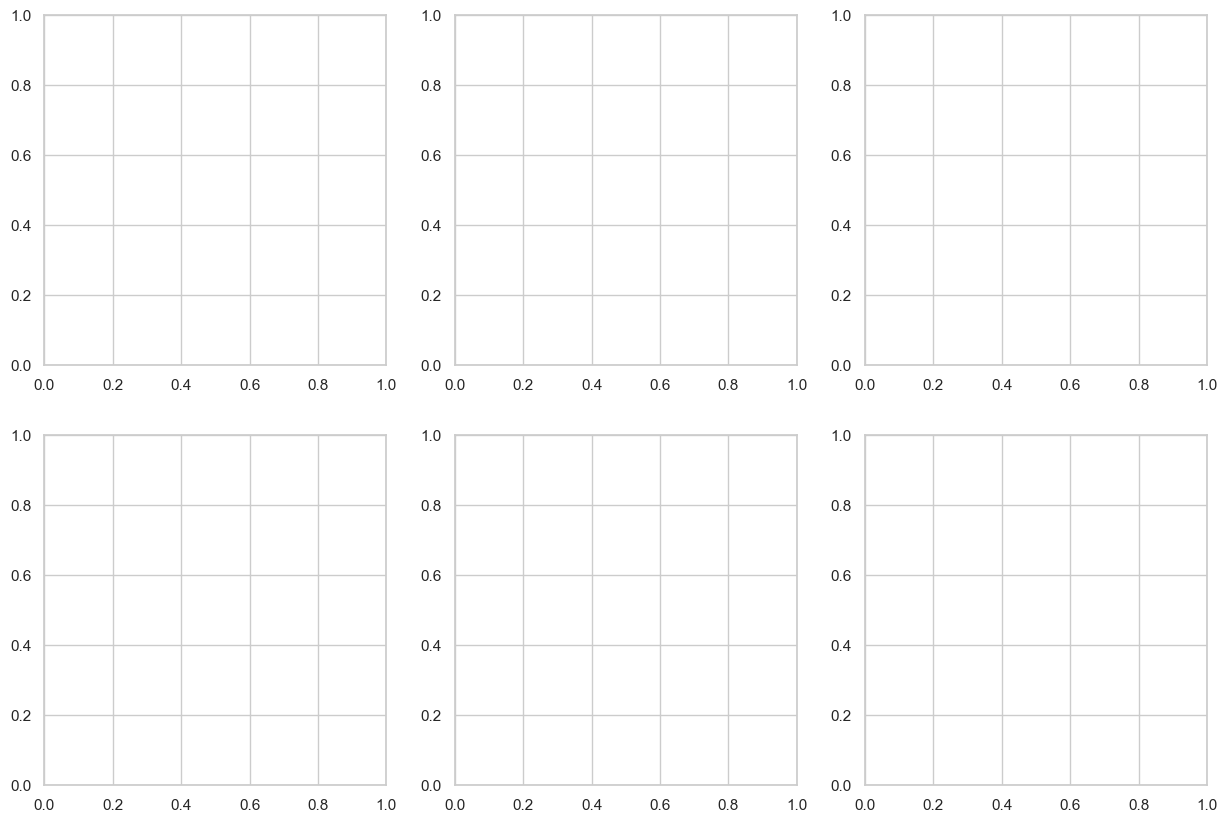

In [9]:
# Analyzing the distribution of key variables
sns.set(style="whitegrid")
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

In [10]:
# Age distribution
sns.histplot(insurance_data_encoded['age'], kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Age Distribution')

Text(0.5, 1.0, 'Age Distribution')

In [11]:
# BMI distribution
sns.histplot(insurance_data_encoded['bmi'], kde=True, ax=ax[0, 1])
ax[0, 1].set_title('BMI Distribution')

Text(0.5, 1.0, 'BMI Distribution')

In [12]:
# Children distribution
sns.histplot(insurance_data_encoded['children'], kde=False, ax=ax[0, 2])
ax[0, 2].set_title('Children Distribution')

Text(0.5, 1.0, 'Children Distribution')

In [13]:
# Smoker distribution
sns.countplot(x='smoker_yes', data=insurance_data_encoded, ax=ax[1, 0])
ax[1, 0].set_title('Smoker Distribution')

Text(0.5, 1.0, 'Smoker Distribution')

In [14]:
# Charges distribution
sns.histplot(insurance_data_encoded['charges'], kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Charges Distribution')

Text(0.5, 1.0, 'Charges Distribution')

In [15]:
# Removing empty subplot
fig.delaxes(ax[1, 2])

In [16]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

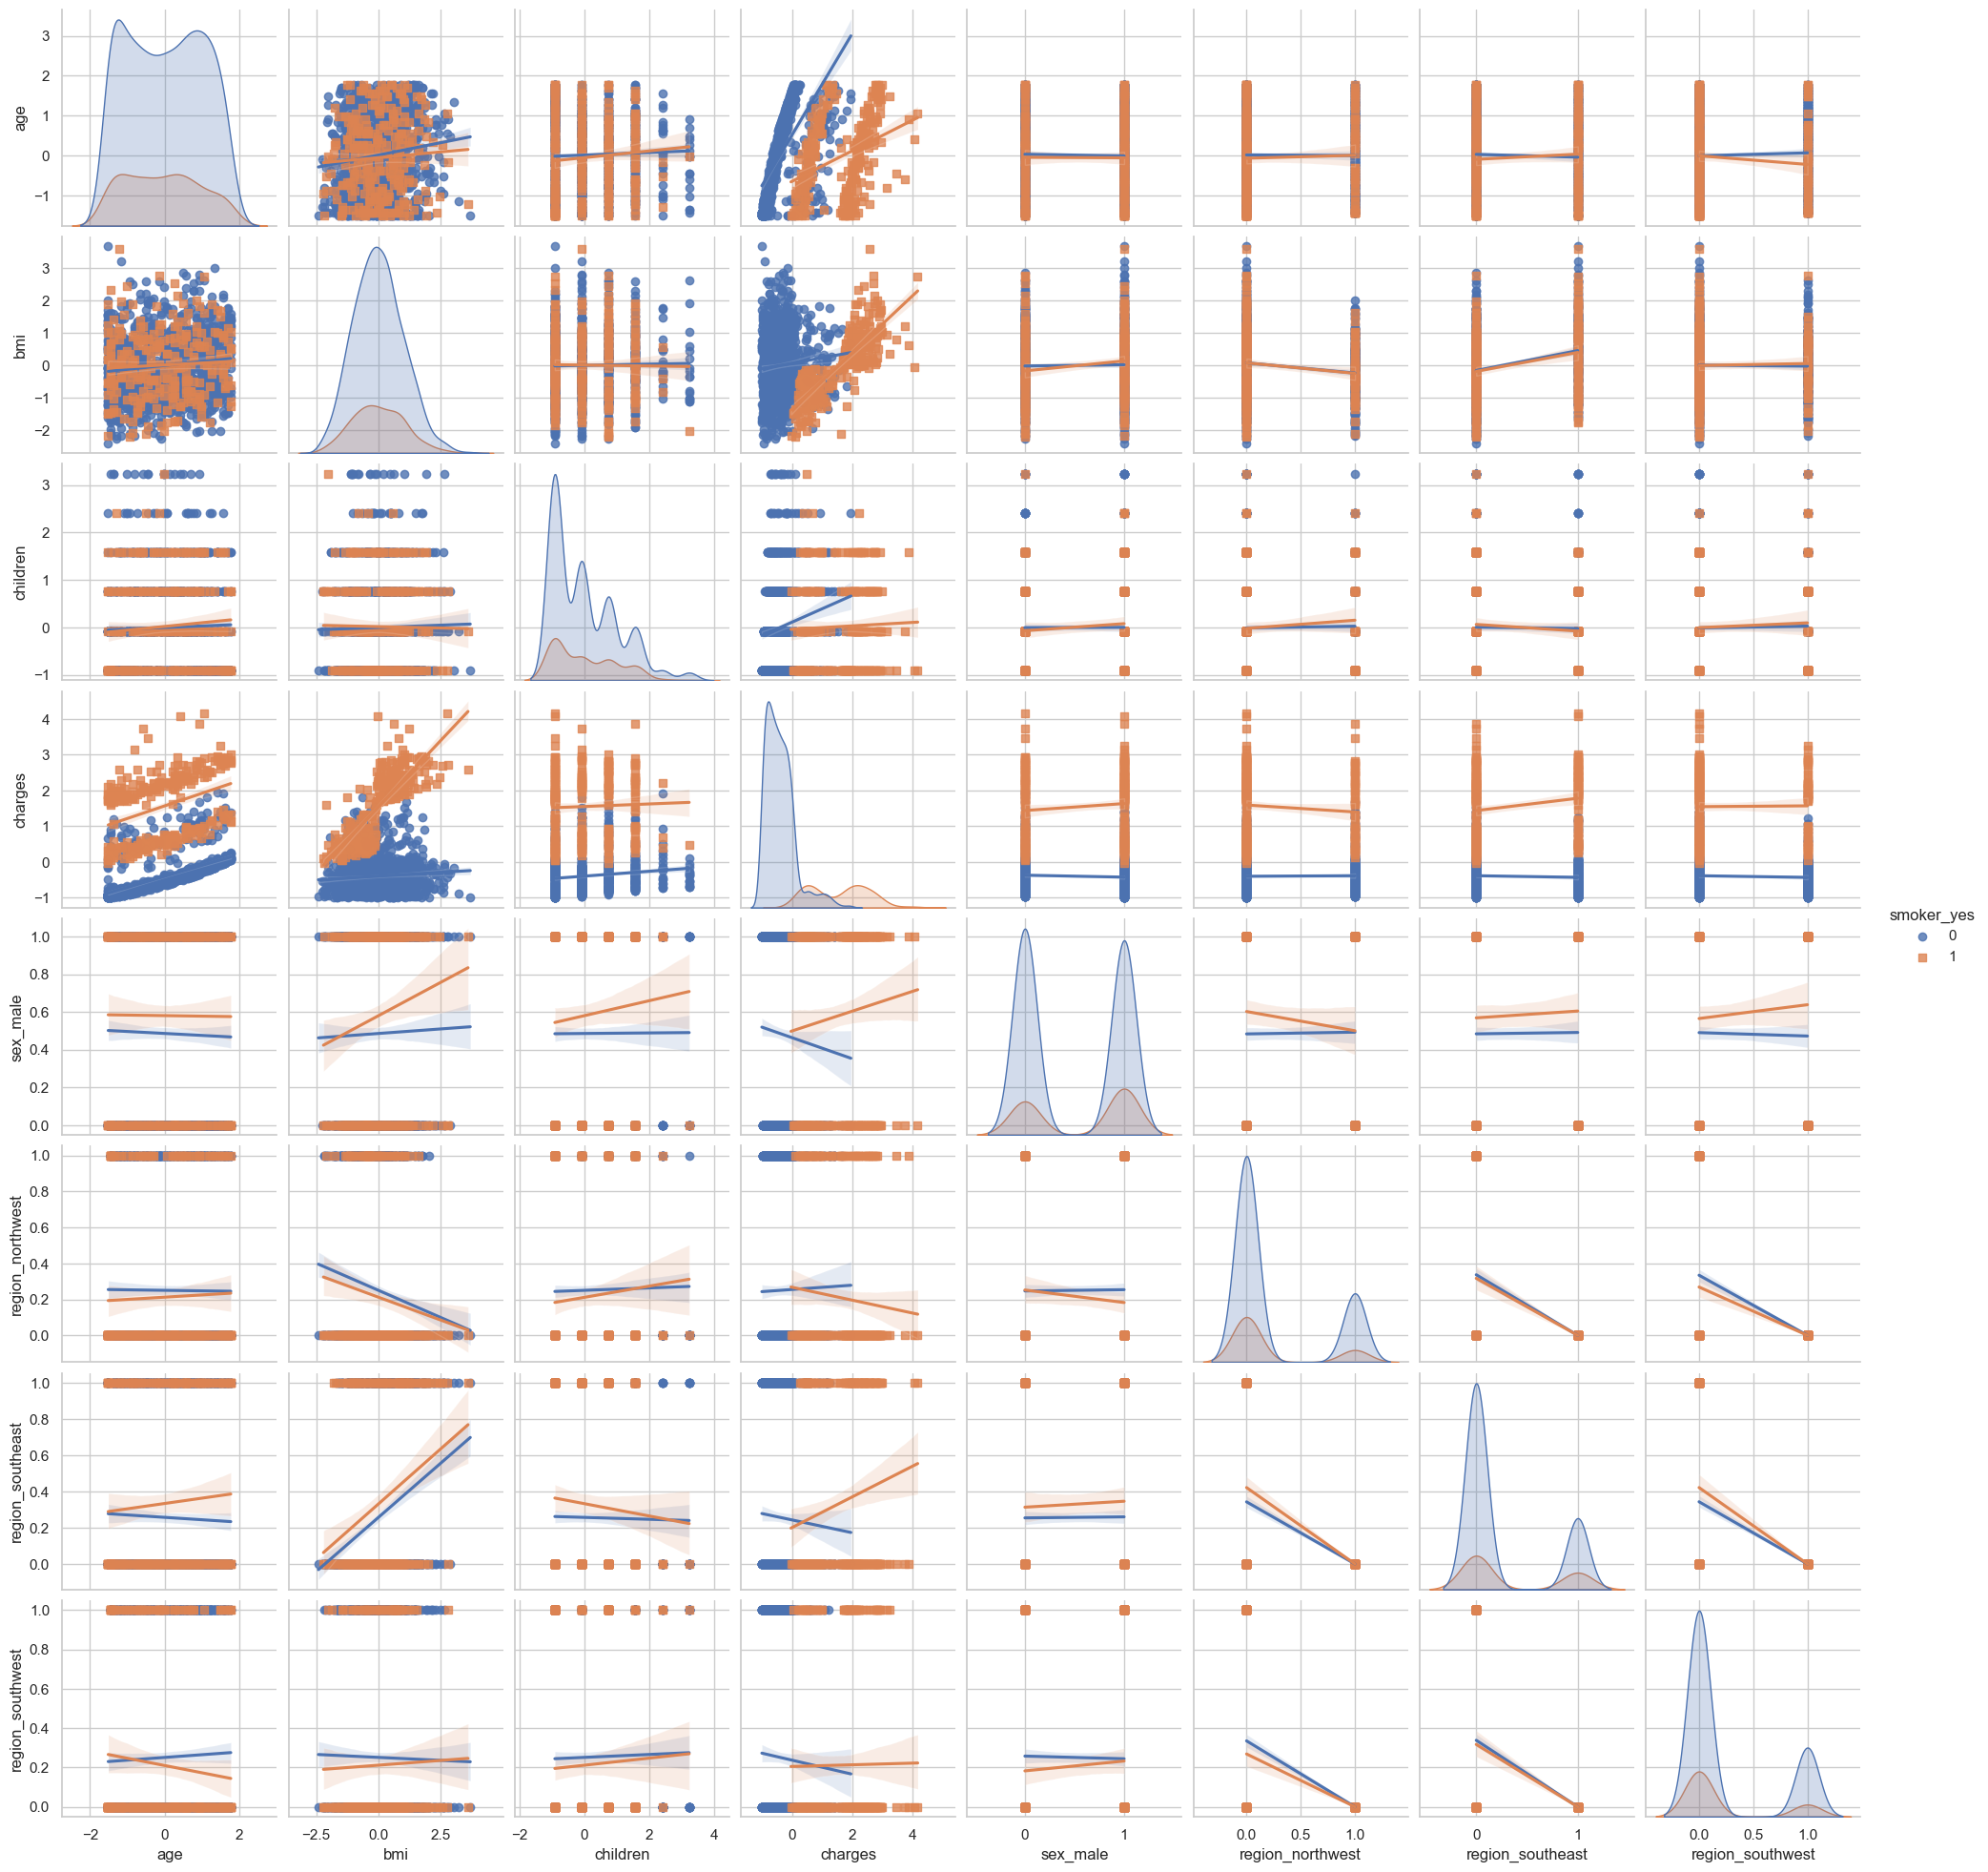

In [17]:
# Investigating relationships between features and the target variable (Charges)
sns.pairplot(insurance_data_encoded, kind='reg', hue='smoker_yes', markers=["o", "s"])
plt.show()

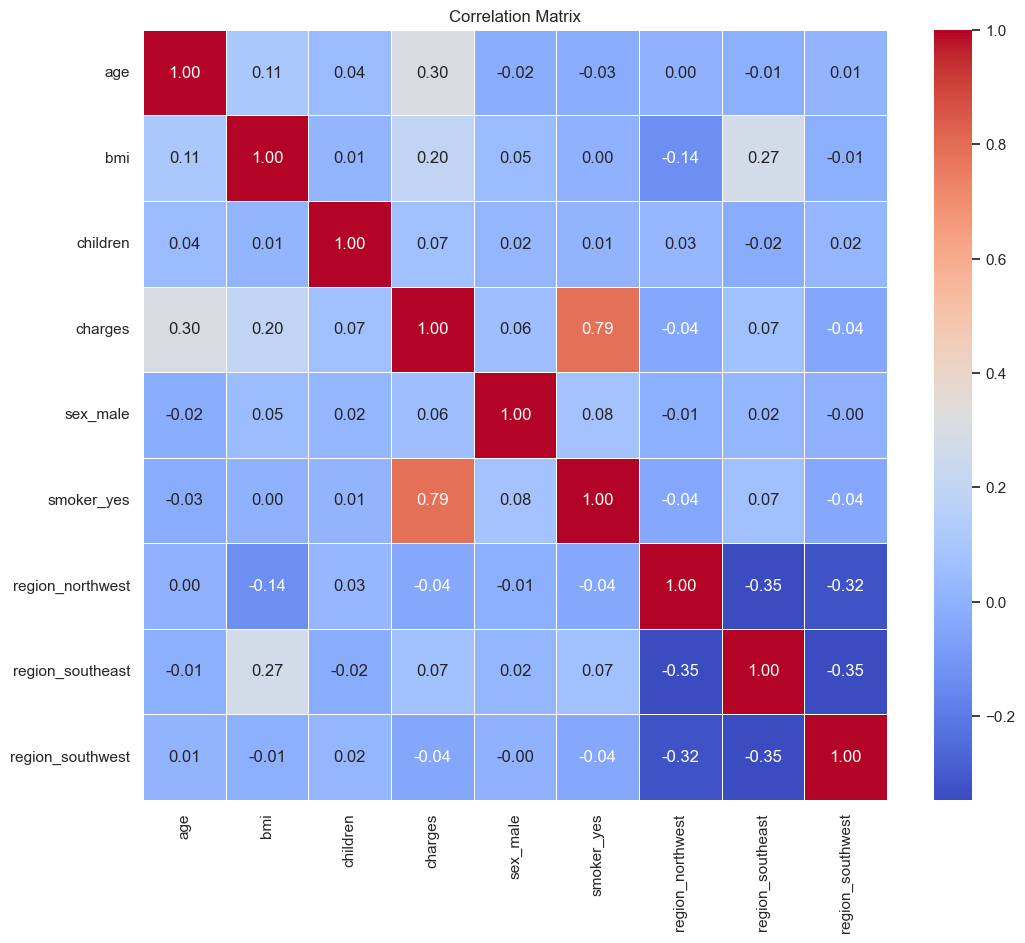

In [18]:
# Creating a heatmap/correlation matrix to identify the relationships between features
correlation_matrix = insurance_data_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Removing outliers from the BMI column
Q1 = insurance_data_encoded['bmi'].quantile(0.25)
Q3 = insurance_data_encoded['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [20]:
# Filtering the dataset to remove outliers
insurance_data_no_bmi_outliers = insurance_data_encoded[(insurance_data_encoded['bmi'] >= lower_bound) & 
                                                        (insurance_data_encoded['bmi'] <= upper_bound)]

In [21]:
# Displaying the first few rows of the updated dataset
print(insurance_data_no_bmi_outliers.head())

        age       bmi  children   charges  sex_male  smoker_yes  \
0 -1.440418 -0.453160 -0.909234  0.297857         0           1   
1 -1.511647  0.509422 -0.079442 -0.954381         1           0   
2 -0.799350  0.383155  1.580143 -0.729373         1           0   
3 -0.443201 -1.305052 -0.909234  0.719104         1           0   
4 -0.514431 -0.292456 -0.909234 -0.777499         1           0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 1                 0                 0  


In [ ]:
# Save the cleaned DataFrame to a CSV file


insurance_data.to_csv('cleaned_insurance_data.csv', index=False)
